In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dog-vs-cat/animals/dog/00985-127787239.png
/kaggle/input/dog-vs-cat/animals/dog/00667-3846168829.png
/kaggle/input/dog-vs-cat/animals/dog/00891-3846169053.png
/kaggle/input/dog-vs-cat/animals/dog/00528-3846168690.png
/kaggle/input/dog-vs-cat/animals/dog/00689-3846168851.png
/kaggle/input/dog-vs-cat/animals/dog/00593-3846168755.png
/kaggle/input/dog-vs-cat/animals/dog/00894-3846169056.png
/kaggle/input/dog-vs-cat/animals/dog/00622-3846168784.png
/kaggle/input/dog-vs-cat/animals/dog/00907-3846169069.png
/kaggle/input/dog-vs-cat/animals/dog/00983-127787237.png
/kaggle/input/dog-vs-cat/animals/dog/00817-3846168979.png
/kaggle/input/dog-vs-cat/animals/dog/00576-3846168738.png
/kaggle/input/dog-vs-cat/animals/dog/00620-3846168782.png
/kaggle/input/dog-vs-cat/animals/dog/00940-3846169102.png
/kaggle/input/dog-vs-cat/animals/dog/00931-3846169093.png
/kaggle/input/dog-vs-cat/animals/dog/00904-3846169066.png
/kaggle/input/dog-vs-cat/animals/dog/00996-127787250.png
/kaggle/input/dog

In [2]:
# important python libraries for deep learning...

import tensorflow as tf  # TensorFlow = "Tensor" + "Flow"

# Tensor means mathematical data —
# like numbers, vectors, matrices, or images.

# Flow means the movement or passing of this data from one layer to another.

# TensorFlow manages  training, maths calculation
# GPU work, aur learning process.

from tensorflow import keras
# keras is the sublibarary of tensorflow
# which are made  for easy code

from keras import Sequential
# sequence is class inside of karas ...
# used for making the full structure like adding  flatten , dense , # conv 2D
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
# dense =  fully connected layer

# conv2D =  this class is mainly for images 
# this class fetches important feautres like edges , 
# corners , shapes


# maxpooling = this reduces the size of the images 
# by which  training computation happens fast ..
# also reduces overfitting ..


# flatten : this  class converts 2d images 
# into 1 D vector .


# batch normalization  : this normalise the outputs of every 
# layer. 
# increses the accuracy 
# improves the stablity



from tensorflow.keras.optimizers import Adam

# we  use this class to optimizes the weight 
# which happens during the training ....
# the epochs when errors comes in forward propogation
# then  we use backpropogation to reduce the 
# loss.



# from tensorflow.keras.callbacks import EarlyStopping,
# ModelCheckpoint.
# We are importing two useful callbacks from Keras:
# EarlyStopping and ModelCheckpoint.


# A callback is a function that automatically
# does something during training.

#     For example:

# Stop training if the model stops improving.
# Save the best model automatically.


#     # EarlyStopping

# Stops training early if the model’s validation loss stops improving.

# Helps to prevent overfitting.



    #️ ModelCheckpoint

# Saves the best model during training automatically.

# Useful to keep the best version for later use.
    

/usr/local/lib/python3.12/site-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [3]:
# 1️ Dataset load (train + validation split)

train_ds = keras.utils.image_dataset_from_directory(
    directory= "/kaggle/input/dog-vs-cat/animals",
    labels =    "inferred",
    label_mode ="int",
    batch_size = 32,
    image_size = (256, 256),
    validation_split = 0.2,
    subset = "training",
    seed = 123
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= "/kaggle/input/dog-vs-cat/animals",
    labels= "inferred",
    label_mode= "int",
    batch_size= 32,
    image_size= (256, 256),
    validation_split =  0.2,
    subset =  "validation",
    seed =  123
)


Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.


2025-10-08 13:43:36.006962: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
 #  Normalize data

def process(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # normalize to [0,1]
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
 #    CNN Model Architecture

model = Sequential([
    
    Conv2D(32, (3,3), padding="valid", activation="relu", input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=2),

    Conv2D(64, (3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=2),

    Conv2D(32, (3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

 
#  Conv2D(32, (3,3), padding="valid",
#  activation="relu", input_shape=(256,256,3))

#  First convolutional layer.

# 32 filters of size 3×3 are applied 
# to the input image (256×256 RGB image).

# Activation = ReLU → introduces non-linearity.
# Purpose: Extract basic features like edges, corners.




  #   @@@@@@@@@@@@@ why we used relu here

#     activation="relu"

# ReLU means Rectified Linear Unit.
# It is written as:

#  If the input is positive, it keeps the same value.
#  If the input is negative, it makes it 0.

#  Why we use ReLU?

# Makes learning faster — because it doesn’t activate 
# all neurons at once.

# Avoids vanishing gradient problem 
# (whom  model learning becomes slow ).

# Adds non-linearity — helps model learn complex patterns.

# Lightweight — it’s simple and fast to compute.

/usr/local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

 #    compilation 

# here we are doing otimization complilation
# beacuse  we know it  is very useful to reduce tha loss
# in backpropogation....

optimizer = Adam(learning_rate=0.0005) # learning rate useful 
# to reduce the loss slowly slowly ...
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,733,217 (14.24 MB)

 Trainable params: 3,732,961 (14.24 MB)

 Non-trainable params: 256 (1.00 KB)

In [7]:
# ======================
# 5️⃣ Callbacks
# =======================
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

In [8]:

#  Train model

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 830ms/step - accuracy: 0.7000 - loss: 0.8019 - val_accuracy: 0.4350 - val_loss: 2.5044
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 827ms/step - accuracy: 0.8838 - loss: 0.3310 - val_accuracy: 0.6900 - val_loss: 0.8661
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 822ms/step - accuracy: 0.9563 - loss: 0.1397 - val_accuracy: 0.8250 - val_loss: 0.5538
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 821ms/step - accuracy: 0.9750 - loss: 0.0672 - val_accuracy: 0.9150 - val_loss: 0.2627
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 824ms/step - accuracy: 0.9800 - loss: 0.0449 - val_accuracy: 0.9250 - val_loss: 0.2800
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 834ms/step - accuracy: 0.9937 - loss: 0.0274 - val_accuracy: 0.9600 - val_loss: 0.1274
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 823ms/step - accuracy: 0.9925 - loss: 0.0181 - val_accuracy: 0.8800 - val_loss: 0.4178
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 837ms/step - accuracy: 0.9862 - loss: 0.0416 - val_accu

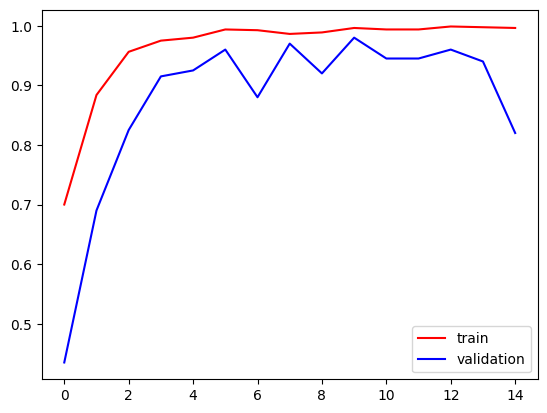

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"] , color = "red" , label ="train")
plt.plot(history.history["val_accuracy"] , color ="blue" , label ="validation")
plt.legend()
plt.show()

In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
img_path = "/kaggle/input/snowbell-cat/1.jpg"

In [12]:
test_img = cv2.imread("/kaggle/input/snowbell-cat/snowbell cat.jpg")

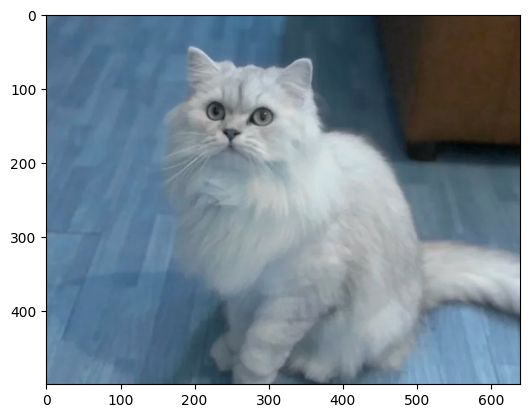

In [13]:
plt.imshow(test_img)

In [14]:
test_img.shape

(499, 640, 3)

In [15]:
test_img = cv2.resize(test_img , (256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[0.8740202]], dtype=float32)

In [18]:
test_img = cv2.imread("/kaggle/input/cryptodog/cryptocurrency dog.jpg")

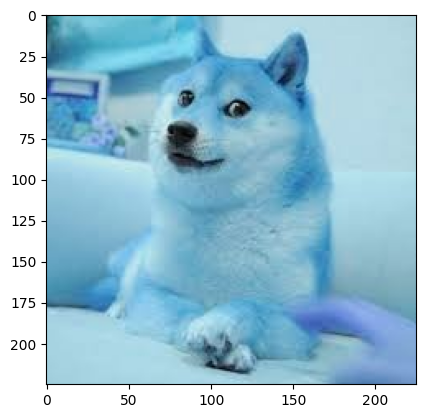

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(225, 225, 3)

In [21]:
test_img = cv2.resize(test_img , (256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.99996]], dtype=float32)

In [24]:
test_img = cv2.imread("/kaggle/input/daggaha/daggaha.jpg")

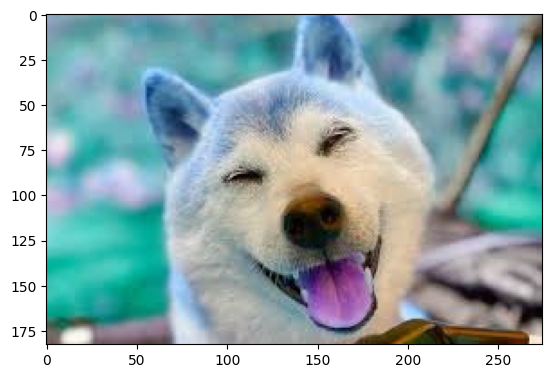

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(183, 275, 3)

In [27]:
test_img = cv2.resize(test_img , (256,256))

In [28]:
test_input = test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.94645387]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.08032733]], dtype=float32)

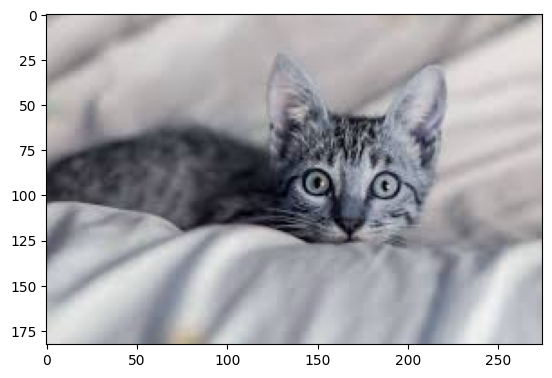

In [30]:
test_img = cv2.imread("/kaggle/input/catecat1/cute cat1 .jpg")
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img , (256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.9921435]], dtype=float32)

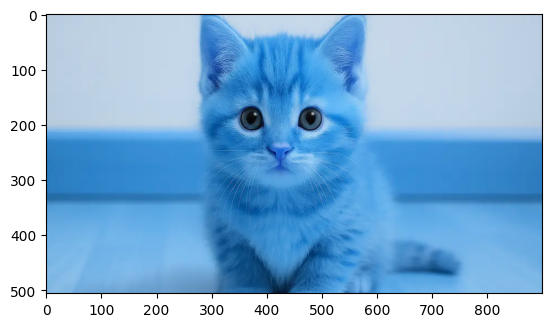

In [31]:
test_img = cv2.imread("/kaggle/input/cutecat2/cute cat2.png")
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img , (256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.04130552]], dtype=float32)

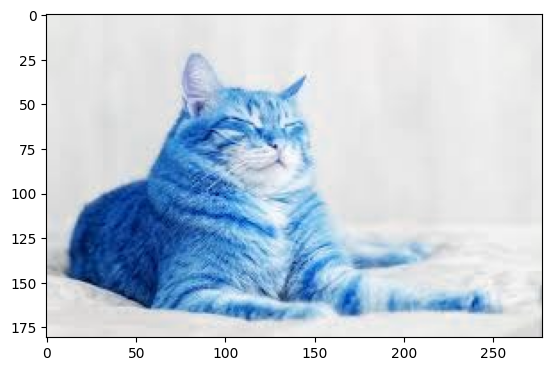

In [32]:
test_img = cv2.imread("/kaggle/input/cutecat3/cutecat3.jpg")
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img , (256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

In [33]:
import numpy as np

all_images = []
all_labels = []

for img, label in validation_ds:
    all_images.append(img)
    all_labels.append(label)

all_images = np.concatenate(all_images)
all_labels = np.concatenate(all_labels)


In [34]:
predictions = model.predict(all_images)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


In [35]:
predictions

array([[1.31558807e-07],
       [1.79945655e-05],
       [1.51384535e-04],
       [9.99931514e-01],
       [4.42918576e-03],
       [4.33231005e-03],
       [9.84892964e-01],
       [2.13866625e-02],
       [5.82065741e-06],
       [9.88674104e-01],
       [9.99963582e-01],
       [9.94900346e-01],
       [3.11190523e-02],
       [3.20266525e-04],
       [3.24734137e-03],
       [9.99987602e-01],
       [7.15219765e-04],
       [9.99870539e-01],
       [1.10802201e-09],
       [1.12557402e-07],
       [8.57173575e-07],
       [4.02416628e-10],
       [9.97051716e-01],
       [9.17542636e-01],
       [4.82478224e-10],
       [5.81984807e-07],
       [3.03408422e-04],
       [9.30522203e-01],
       [9.98230278e-01],
       [9.99998391e-01],
       [5.69865551e-06],
       [4.31409042e-09],
       [9.99987841e-01],
       [3.53689096e-03],
       [9.99999642e-01],
       [4.82841287e-08],
       [1.87124955e-04],
       [6.75923006e-09],
       [9.97156262e-01],
       [9.80997691e-04],


In [36]:
predicted_classes = (predictions > 0.5).astype(int)


In [37]:
predicted_classes

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [40]:
import numpy as np

# Suppose predicted_classes_full is your full 0/1 array
np.save("predicted_classes.npy", predicted_classes)



In [43]:
predicted_classes = np.load("predicted_classes.npy")
print(predicted_classes.shape)  # check size


(200, 1)


In [44]:
import os
print(os.getcwd())


/kaggle/working
